# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0 ,3]})

Draw a dispersion diagram (scatter plot) for the data.

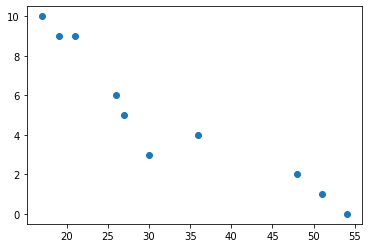

In [3]:
# Your code here.
x = student_data[['Age']]
y = student_data['Tardies']

plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
'The graph shows a tendency of how older is the student, less tardies they have'


'The graph shows a tendency of how older is the student, less tardies they have'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
#correlation:
corr = student_data.corr()
print('Correlation:', corr)

#covariance:
cov = student_data.cov()
print('Covariance:', cov)

Correlation:               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000
Covariance:                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [4]:
# Your response here.
model = linear_model.LinearRegression()

Plot your regression model on your scatter plot.

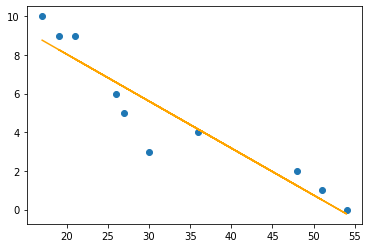

In [5]:
# Your code here.
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_ [0]* x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
'the two variables have a high correlation. They are more likely to change together in a predictable way.'
'The covariance is positive, it means that the two variables tend to increase or decrease together.'

'The covariance is positive, it means that the two variables tend to increase or decrease together.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [6]:
# Import any libraries you may need & the data
v = pd.read_csv('vehicles.csv')


In [7]:
import seaborn as sns

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
# Your response here. 
corr_matrix = v.corr()
# Print the correlation matrix

co2_sorted = corr_matrix.sort_values(by='CO2 Emission Grams/Mile')
co2_sorted



,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865


In [ ]:
print('Variable "Fuel Barrels/Year" is the most important in determining CO2 emissions')

print('Variable "Year" is the least relevant')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [14]:
# Your response here. 
model = linear_model.LinearRegression()


In [15]:
x = v[['CO2 Emission Grams/Mile']]
y = v['Fuel Barrels/Year']

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

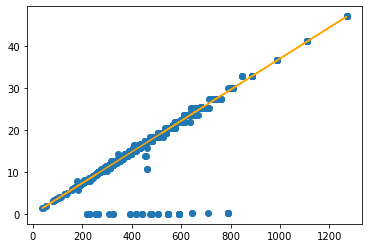

In [17]:
result = model.fit(x,y)
regression_line = result.intercept_ + result.coef_ [0]* x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [37]:
# Your code here.
parties = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [38]:
model = linear_model.LinearRegression()

In [39]:
x = parties[['X']]
y = parties['Y']

In [40]:
p = model.fit(x,y)

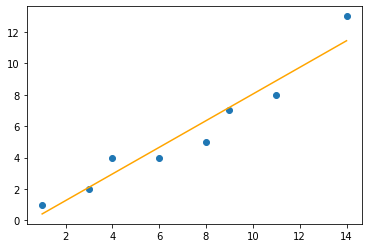

In [42]:
# Your code here.
regression_line = p.intercept_ + p.coef_ [0]* x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [29]:
'''It appears that there is a positive relationship between the two variables, 
meaning that as the number of people invited increases, the number of people who attend also tends to increase'''

0.9652303546573691


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Text(0, 0.5, 'Value')

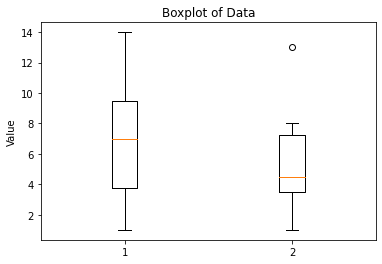

In [47]:
# Your response here. 
fig, ax = plt.subplots()
ax.boxplot(parties)
ax.set_title('Boxplot of Data')
ax.set_ylabel('Value')


In [48]:
n_p = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1, 2, 4, 4, 5, 7, 8]})

In [ ]:
model = linear_model.LinearRegression()

In [49]:
x = n_p[['X']]
y = n_p['Y']

In [53]:
p2 = model.fit(x,y)

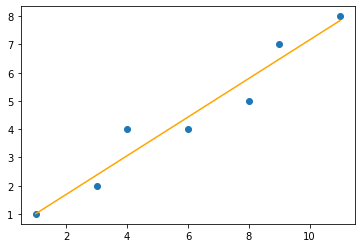

In [54]:
regression_line = p2.intercept_ + p2.coef_[0] * x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [55]:
n_corr = n_p['X'].corr(n_p['Y']) 
n_corr

0.9712781168250859

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''Removing the outlier the correlation gets even better'''